In [0]:
!wget "https://onedrive.live.com/download?cid=55A814C0F90D2E25&resid=55A814C0F90D2E25%2162953&authkey=AKZ3KYgMJaklUeA" -O dataset.zip

--2019-12-13 05:32:53--  https://onedrive.live.com/download?cid=55A814C0F90D2E25&resid=55A814C0F90D2E25%2162953&authkey=AKZ3KYgMJaklUeA
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://epbnvg.bn.files.1drv.com/y4mUMYto_u87u4W6eAtIbF3vSEqgJuopYD322vH3XxbEo7Fo9Abv4bIumHY0BTf8R_7be5hdaGmLNgIRsucfxUUrpip5ptT8oAJ99KNQUh3QNKvYoRF6aTlpt8F0DebyVT1HI0ygUu91RjzdaRj7oBTcDn7LQRVdOQBBYaCIZ03P-R1dwLOc3qKcjFftnQ99w22QSu25td235n7xpX_qpIs5Q/dataset_facenet.zip?download&psid=1 [following]
--2019-12-13 05:32:54--  https://epbnvg.bn.files.1drv.com/y4mUMYto_u87u4W6eAtIbF3vSEqgJuopYD322vH3XxbEo7Fo9Abv4bIumHY0BTf8R_7be5hdaGmLNgIRsucfxUUrpip5ptT8oAJ99KNQUh3QNKvYoRF6aTlpt8F0DebyVT1HI0ygUu91RjzdaRj7oBTcDn7LQRVdOQBBYaCIZ03P-R1dwLOc3qKcjFftnQ99w22QSu25td235n7xpX_qpIs5Q/dataset_facenet.zip?download&psid=1
Resolving epbnvg.bn.files.1drv.com (epbnvg.bn

In [0]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: faces_labeled/
  inflating: __MACOSX/._faces_labeled  
   creating: faces_labeled/Daus/
  inflating: __MACOSX/faces_labeled/._Daus  
   creating: faces_labeled/Putri/
  inflating: __MACOSX/faces_labeled/._Putri  
  inflating: faces_labeled/.DS_Store  
  inflating: __MACOSX/faces_labeled/._.DS_Store  
   creating: faces_labeled/Ghani/
  inflating: __MACOSX/faces_labeled/._Ghani  
   creating: faces_labeled/Muhajir/
  inflating: __MACOSX/faces_labeled/._Muhajir  
   creating: faces_labeled/Fino/
  inflating: __MACOSX/faces_labeled/._Fino  
   creating: faces_labeled/Akmal/
  inflating: __MACOSX/faces_labeled/._Akmal  
   creating: faces_labeled/Bu_Nanik/
  inflating: __MACOSX/faces_labeled/._Bu_Nanik  
   creating: faces_labeled/Ayas/
  inflating: __MACOSX/faces_labeled/._Ayas  
   creating: faces_labeled/Fadilla/
  inflating: __MACOSX/faces_labeled/._Fadilla  
   creating: faces_labeled/Pak_Munif/
  inflating: __MACOSX/faces_labeled/._Pak_Munif  
   cr

In [0]:
!rm -r __MACOSX
!find . -name '.DS_Store' -type f -delete

In [0]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 9.6MB/s 


In [0]:
import mtcnn
# print version
print(mtcnn.__version__)

Using TensorFlow backend.


0.1.0


In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # opencv
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from keras.models import load_model
from PIL import Image

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("faces_labeled"))

# Any results you write to the current directory are saved as output.

['Fasma', 'Pak_Munif', 'Putri', 'Daus', 'Fadilla', 'Muhajir', 'Akmal', 'Indra', 'Yuda', 'Rasyid', 'Ayas', 'Fino', 'Bu_Nanik', 'Ghani', 'Jonathan', 'Alvin']


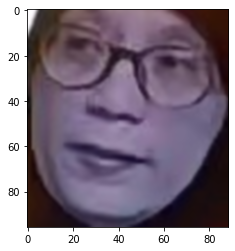

(96, 89, 3)


In [0]:
img = cv2.imread('faces_labeled/Bu_Nanik/3_20191120083053_18.jpg')
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
print(img.shape)

In [0]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

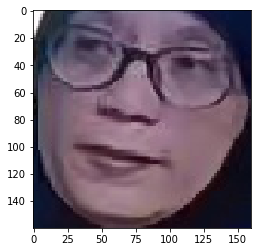

(160, 160, 3)


In [0]:
# load the photo and extract the face
pixels = extract_face('faces_labeled/Bu_Nanik/3_20191120083053_18.jpg')
plt.imshow(pixels)
plt.show()
print(pixels.shape)

In [0]:
def load_face(dir):
    faces = list()
    # enumerate files
    for filename in os.listdir(dir):
        path = dir + filename
        face = extract_face(path)
        faces.append(face)
    return faces

In [0]:
def load_dataset(dir):
    # list for faces and labels
    X, y = list(), list()
    for subdir in os.listdir(dir):
        print(subdir)
        path = dir + subdir + '/'
        faces = load_face(path)
        labels = [subdir for i in range(len(faces))]
        print("loaded %d sample for class: %s" % (len(faces),subdir) ) # print progress
        X.extend(faces)
        y.extend(labels)
    return np.asarray(X), np.asarray(y)

In [0]:
load_dataset('faces_labeled/')

Fasma
loaded 5 sample for class: Fasma
Pak_Munif
loaded 73 sample for class: Pak_Munif
Putri
loaded 77 sample for class: Putri
Daus
loaded 12 sample for class: Daus
Fadilla
loaded 55 sample for class: Fadilla
Muhajir
loaded 33 sample for class: Muhajir
Akmal
loaded 17 sample for class: Akmal
Indra
loaded 11 sample for class: Indra
Yuda
loaded 11 sample for class: Yuda
Rasyid
loaded 17 sample for class: Rasyid
Ayas
loaded 421 sample for class: Ayas
Fino
loaded 21 sample for class: Fino
Bu_Nanik
loaded 68 sample for class: Bu_Nanik
Ghani
loaded 69 sample for class: Ghani
Jonathan
loaded 29 sample for class: Jonathan
Alvin
loaded 14 sample for class: Alvin


(array([[[[ 19,  19,  31],
          [ 18,  18,  30],
          [ 16,  16,  28],
          ...,
          [238, 238, 238],
          [244, 246, 245],
          [250, 254, 253]],
 
         [[ 18,  18,  30],
          [ 18,  18,  30],
          [ 17,  17,  29],
          ...,
          [132, 132, 130],
          [161, 163, 162],
          [155, 159, 158]],
 
         [[ 18,  18,  30],
          [ 18,  18,  30],
          [ 16,  16,  28],
          ...,
          [ 29,  28,  24],
          [ 36,  36,  34],
          [ 28,  30,  29]],
 
         ...,
 
         [[ 38,  20,  18],
          [ 37,  19,  17],
          [ 37,  17,  16],
          ...,
          [202, 226, 252],
          [156, 176, 213],
          [187, 201, 248]],
 
         [[ 39,  19,  18],
          [ 38,  18,  17],
          [ 37,  17,  16],
          ...,
          [184, 208, 234],
          [165, 185, 222],
          [182, 196, 245]],
 
         [[ 40,  21,  17],
          [ 38,  19,  15],
          [ 37,  17,  16],
   

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# load train dataset
X, y = load_dataset('faces_labeled/')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
print(X_train.shape, y_train.shape)
# load test dataset
print(X_test.shape, y_test.shape)

# save and compress the dataset for further use
np.savez_compressed('tc-faces-dataset.npz', X_train, y_train, X_test, y_test)

Fasma
loaded 5 sample for class: Fasma
Pak_Munif
loaded 73 sample for class: Pak_Munif
Putri
loaded 77 sample for class: Putri
Daus
loaded 12 sample for class: Daus
Fadilla
loaded 55 sample for class: Fadilla
Muhajir
loaded 33 sample for class: Muhajir
Akmal
loaded 17 sample for class: Akmal
Indra
loaded 11 sample for class: Indra
Yuda
loaded 11 sample for class: Yuda
Rasyid
loaded 17 sample for class: Rasyid
Ayas
loaded 421 sample for class: Ayas
Fino
loaded 21 sample for class: Fino
Bu_Nanik
loaded 68 sample for class: Bu_Nanik
Ghani
loaded 69 sample for class: Ghani
Jonathan
loaded 29 sample for class: Jonathan
Alvin
loaded 14 sample for class: Alvin
(653, 160, 160, 3) (653,)
(280, 160, 160, 3) (280,)


In [0]:
# load the face dataset
data = np.load('tc-faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (653, 160, 160, 3) (653,) (280, 160, 160, 3) (280,)


In [0]:
# load the facenet model
facenet_model = load_model('keras-facenet/model/facenet_keras.h5')
print('Loaded Model')













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Loaded Model


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [0]:
def get_embedding(model, face):
    # scale pixel values
    face = face.astype('float32')
    # standardization
    mean, std = face.mean(), face.std()
    face = (face-mean)/std
    # transfer face into one sample (3 dimension to 4 dimension)
    sample = np.expand_dims(face, axis=0)
    # make prediction to get embedding
    yhat = model.predict(sample)
    return yhat[0]

In [0]:
# convert each face in the train set into embedding
emdTrainX = list()
for face in trainX:
    emd = get_embedding(facenet_model, face)
    emdTrainX.append(emd)
    
emdTrainX = np.asarray(emdTrainX)
print(emdTrainX.shape)

(653, 128)


In [0]:
# convert each face in the test set into embedding
emdTestX = list()
for face in testX:
    emd = get_embedding(facenet_model, face)
    emdTestX.append(emd)
emdTestX = np.asarray(emdTestX)
print(emdTestX.shape)

# save arrays to one file in compressed format
np.savez_compressed('tc-faces-embeddings.npz', emdTrainX, trainy, emdTestX, testy)

(280, 128)


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

In [0]:
print("Dataset: train=%d, test=%d" % (emdTrainX.shape[0], emdTestX.shape[0]))
# normalize input vectors
in_encoder = Normalizer()
emdTrainX_norm = in_encoder.transform(emdTrainX)
emdTestX_norm = in_encoder.transform(emdTestX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy_enc = out_encoder.transform(trainy)
testy_enc = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(emdTrainX_norm, trainy_enc)
# predict
yhat_train = model.predict(emdTrainX_norm)
yhat_test = model.predict(emdTestX_norm)
# score
score_train = accuracy_score(trainy_enc, yhat_train)
score_test = accuracy_score(testy_enc, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Dataset: train=653, test=280
Accuracy: train=92.496, test=84.643


Predicted: 
['Akmal' 'Alvin' 'Ayas' 'Bu_Nanik' 'Daus'] 
[3.97166589e-01 8.03456447e-02 9.70936035e+01 1.15930155e-02
 1.41181267e-01 6.14336746e-02 5.65858480e-02 2.96886555e-01
 9.56832614e-02 5.08658277e-01 2.01442797e-01 3.69508238e-01
 1.62715652e-01 8.59234625e-02 2.82499664e-01 1.54772602e-01]
Expected: Ayas


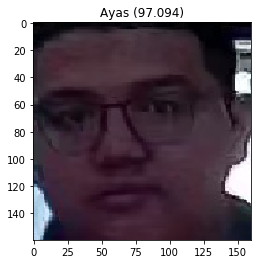

In [0]:
from random import choice
# select a random face from test set
selection = choice([i for i in range(testX.shape[0])])
random_face = testX[selection]
random_face_emd = emdTestX_norm[selection]
random_face_class = testy_enc[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

# prediction for the face
samples = np.expand_dims(random_face_emd, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
all_names = out_encoder.inverse_transform([0,1,2,3,4])
#print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Predicted: \n%s \n%s' % (all_names, yhat_prob[0]*100))
print('Expected: %s' % random_face_name[0])
# plot face
plt.imshow(random_face)
title = '%s (%.3f)' % (predict_names[0], class_probability)
plt.title(title)
plt.show()

## Video Test

In [0]:
cap = cv2.VideoCapture('3_20191120083053.mp4')

In [0]:
detector = MTCNN()

In [0]:
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

# Default resolutions of the frame are obtained.The default resolutions are system dependent.
# We convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
 
# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
out = cv2.VideoWriter('outpy.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

# Read until video is completed
while(True):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if not ret:
    break

  detect = detector.detect_faces(frame)
  if detect:
    x, y, w, h = detect[0]['box']
    image = frame[y:y+h, x:x+w]
    if len(image) > 0:
      # print(image)
      image = cv2.resize(image,(160,160))
      face_array = np.asarray(image)
      emd = get_embedding(facenet_model,face_array)
      samples = np.expand_dims(emd, axis=0)
      yhat_class = model.predict(samples)
      predict_names = out_encoder.inverse_transform(yhat_class)

      print(predict_names[0])
      # yhat_prob = model.predict_proba(samples)

      frame = cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 3)
      frame = cv2.putText(frame, predict_names[0], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
  out.write(frame)
 
# When everything done, release the video capture object
cap.release()
out.release()

Ghani
Ghani
Ghani
Ghani
Putri
Fadilla
Putri
Putri
Ghani
Muhajir
Muhajir
Muhajir
Putri
Bu_Nanik
Muhajir
Putri
Fino
Putri
Muhajir
Putri
Jonathan
Fadilla
Putri
Putri
Muhajir
Fasma
Ghani
Bu_Nanik
Bu_Nanik
Bu_Nanik
Bu_Nanik
Bu_Nanik
Bu_Nanik
Fadilla
Fadilla
Fadilla
Bu_Nanik
Fadilla
Fadilla
Fadilla
Fadilla
Fasma
Indra
Bu_Nanik
Bu_Nanik
Daus
Muhajir
Muhajir
Ghani
Muhajir
Bu_Nanik
Bu_Nanik
Fadilla
Bu_Nanik
Muhajir
Bu_Nanik
Muhajir
Daus
Fadilla
Fadilla
Fadilla
Fadilla
Putri
Bu_Nanik
Bu_Nanik
Bu_Nanik
Bu_Nanik
Bu_Nanik
Bu_Nanik
Bu_Nanik
Putri
Ghani
Fino
Bu_Nanik
Jonathan
Bu_Nanik
Fino
Bu_Nanik
Bu_Nanik
Bu_Nanik
Bu_Nanik
Muhajir
Jonathan
Indra
Jonathan
Bu_Nanik
Bu_Nanik
Bu_Nanik
Bu_Nanik
Bu_Nanik
Daus
Bu_Nanik
Bu_Nanik
Muhajir
Fadilla
Fadilla
Fadilla
Fadilla
Bu_Nanik
Bu_Nanik
Bu_Nanik
Bu_Nanik
Bu_Nanik
Bu_Nanik
Bu_Nanik
Bu_Nanik
Bu_Nanik
Bu_Nanik
Bu_Nanik
Bu_Nanik
Bu_Nanik
Bu_Nanik
Bu_Nanik
Bu_Nanik
Fadilla
Bu_Nanik
Bu_Nanik
Bu_Nanik
Bu_Nanik
Pak_Munif
Yuda
Fadilla
Putri
